In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import pmf_from_dist, make_uniform, make_gamma_dist, update_gamma, make_beta_dist, update_beta
from data.utils import make_dirichlet_dist, update_dirichlet, marginal_beta

In [3]:
alpha = 1.4
beta = 1
dist = ss.gamma(alpha, scale=1/beta)
lams = np.linspace(0, 10, 101)
ps = dist.pdf(lams)
prior = Pmf(ps, lams)
prior.normalize()
prior

,probs
0.0,0.000000
0.1,0.041053
0.2,0.049015
0.3,0.052160
0.4,0.052952
...,...
9.6,0.000019
9.7,0.000017
9.8,0.000016
9.9,0.000014


In [4]:
k = 4
likelihood = ss.poisson(lams).pmf(k)

<AxesSubplot:>

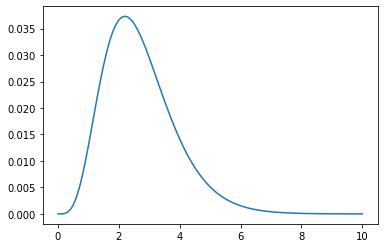

In [5]:
posterior = prior * likelihood
posterior.normalize()
posterior.plot()

In [6]:
alpha = 1.4
beta = 1
prior_gamma = make_gamma_dist(alpha, beta)
prior_gamma.mean(), prior_gamma.var()

(1.4, 1.4)

In [7]:
data = 4, 1
posterior_gamma = update_gamma(prior_gamma, data)

In [8]:
posterior_conjugate = pmf_from_dist(posterior_gamma, lams)
np.allclose(posterior_conjugate, posterior)

True

In [9]:
xs = np.linspace(0, 1, 101)
uniform = make_uniform(xs, name='uniform')
k, n = 140, 250
xs = uniform.qs
likelihood = ss.binom(n, xs).pmf(k)
posterior = uniform * likelihood
posterior.normalize()
posterior

,probs
uniform,
0.00,0.000000e+00
0.01,1.256330e-207
0.02,5.731921e-166
0.03,8.338711e-142
0.04,8.269265e-125
...,...
0.96,2.107677e-83
0.97,1.624102e-96
0.98,2.911941e-115


In [10]:
prior_beta = make_beta_dist(1, 1)
data = 140, 250
posterior_beta = update_beta(prior_beta, data)
posterior_conjugate = pmf_from_dist(posterior_beta, xs)

<AxesSubplot:>

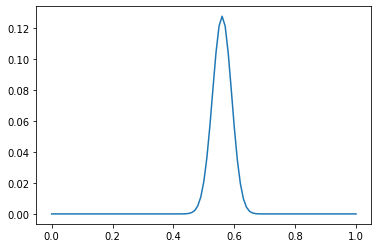

In [11]:
posterior_conjugate.plot()

In [12]:
data = 3, 2, 1
n = np.sum(data)
ps = 0.4, 0.3, 0.3
ss.multinomial(n, ps).pmf(data)

0.10368

In [13]:
alpha_vector = 1, 1, 1
dist = ss.dirichlet(alpha_vector)
dist.alpha

array([1, 1, 1])

In [14]:
sample = dist.rvs(1000)
sample.T

array([[0.10793875, 0.12387184, 0.16362054, ..., 0.28862068, 0.30462039,
        0.74777548],
       [0.55492103, 0.23824091, 0.75583292, ..., 0.5558955 , 0.10821715,
        0.20716913],
       [0.33714022, 0.63788725, 0.08054654, ..., 0.15548382, 0.58716246,
        0.04505539]])

<AxesSubplot:>

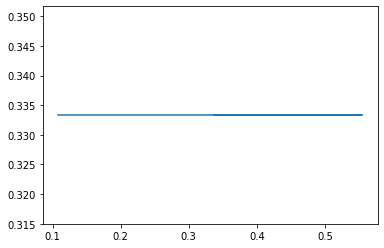

In [15]:
# 실험용인데 잘 안되는듯..
prior_dist = make_dirichlet_dist(alpha_vector)
data = 3, 2, 1
posterior_dirichlet = update_dirichlet(prior_dist, data)
posterior_conjugate1 = pmf_from_dist(posterior_dirichlet, sample.T[:, 0])
posterior_conjugate1.plot()

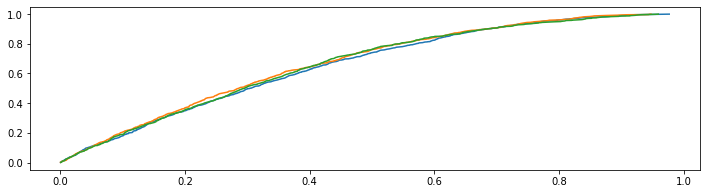

In [16]:
sample = dist.rvs(1000)
cdfs = [Cdf.from_seq(col) for col in sample.T]
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
for cdf in cdfs:
    ax.plot(cdf)

In [19]:
marginals = [marginal_beta(alpha_vector, i) for i in range(len(alpha_vector))]

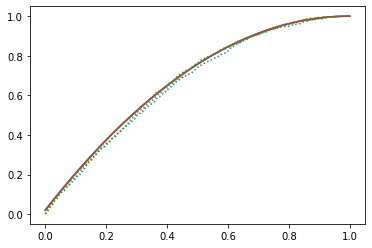

In [21]:
xs = np.linspace(0, 1, 101)

for i in range(len(alpha_vector)):
    label = f'Column {i}'
    
    pmf = pmf_from_dist(marginals[i], xs)
    pmf.make_cdf().plot(color='C5')
    
    cdf = cdfs[i]
    cdf.plot(label=label, ls=':')